## Introduction

We will compare ASSURE and Coupled Bootstrap on simulated data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import os
import sys
sys.path.append("../")
import methods  
importlib.reload(methods)

<module 'methods' from '/Users/timothysudijono/Projects/statistics/empirical_bayes/CompoundWelfareMaximization/notebooks/../methods.py'>

In [ ]:
def compare_methods(true_effects, sigmas, mc_runs = 50):
    """
    Methods: List of Strings of which methods to run
    """
    assure_welfares = np.zeros(mc_runs).astype(float)
    cb_welfares = np.zeros(mc_runs).astype(float)

    for j in range(mc_runs):
        Xs = true_effects + np.random.normal(0,sigmas)
        n = len(Xs)
        C_grid = np.linspace(-5, 5, 500)

        ### assure
        assure_curve = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5);
        threshold = C_grid[np.argmax(assure_curve)]
        assure_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### CB Welfare
        cb_welfare_curve = methods.coupled_bootstrap(Xs, sigmas,eps = 1./n**0.2, lb = -5, ub = 5)
        threshold = C_grid[np.argmax(cb_welfare_curve)]
        cb_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()


    return [assure_welfares,  cb_welfares]



## Case I: Homogeneous Normal with Small Positive Mean

In [28]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.logspace(np.log10(50), np.log10(1e5), num=10, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 10

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(0.25, 1, n)
    sigmas = np.ones(n)

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()


49
116
270
629
1465
3410
7937
18468
42975
100000


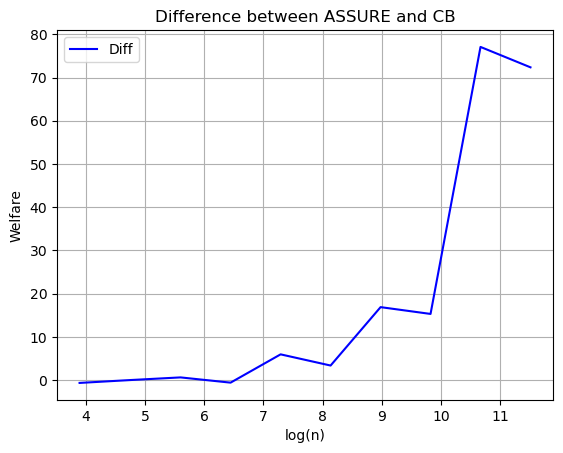

In [29]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')


plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()


## Case 1.5: Homogeneous with Small Negative Mean

In [31]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.logspace(np.log10(50), np.log10(1e5), num=10, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 10

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(-0.5, 1, n)
    sigmas = np.ones(n)

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
116
270
629
1465
3410
7937
18468
42975
100000


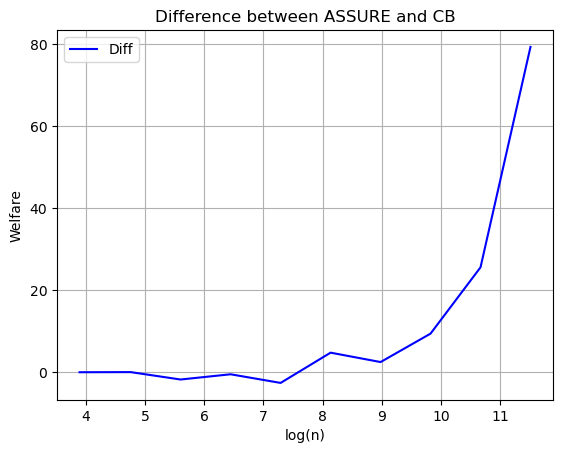

In [32]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')
# plt.fill_between(log_ns,
#                  diffs - diffs_ses,
#                  diffs + diffs_ses,
#                  color='blue', alpha=0.3)


plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()


## Case II: Heterogeneous Normal with Small Positive Mean

In [33]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.logspace(np.log10(50), np.log10(1e5), num=10, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 10

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(0.5,1,n)
    sigmas = np.random.chisquare(5,n)/5

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
116
270
629
1465
3410
7937
18468
42975
100000


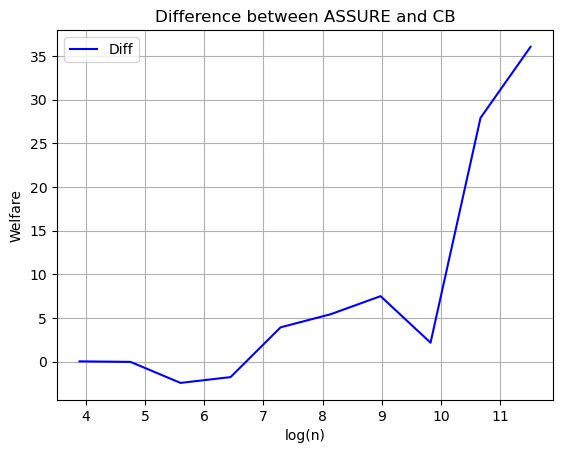

In [ ]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')
plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()


## Case 2.5: Heterogeneous Normal with Small Positive Mean and Large Variance

In [48]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.logspace(np.log10(50), np.log10(2e5), num=15, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 15

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(0.5,1,n)
    sigmas = np.random.chisquare(5,n)

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
90
163
295
534
966
1748
3162
5718
10341
18701
33818
61157
110596
200000


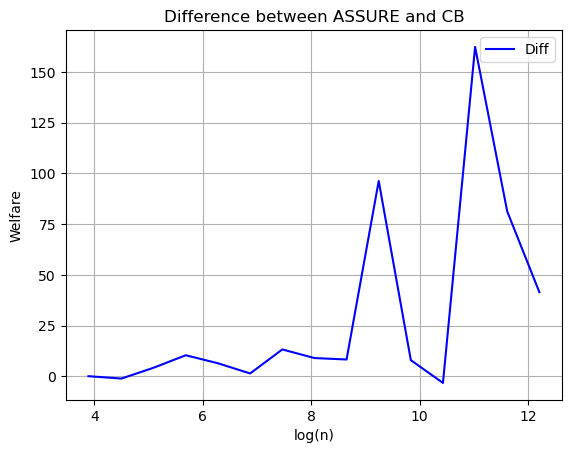

In [50]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')
plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()

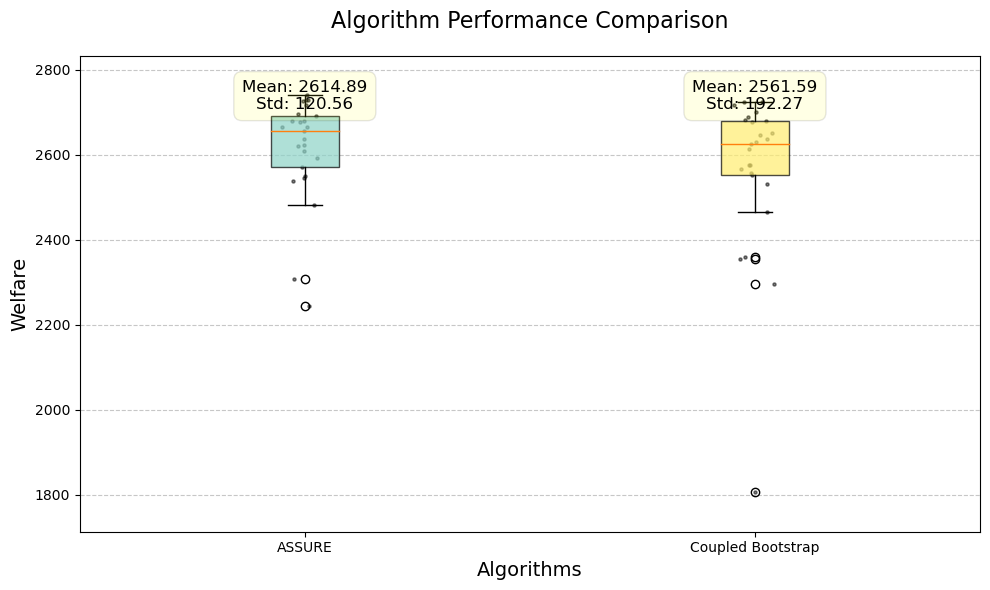

In [52]:
n = 10000
true_effects = np.random.normal(0.25,1,n)
sigmas = np.random.chisquare(5,n)

labels = ["ASSURE", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case III: Heterogeneous Normal with Large Positive Mean

In [37]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.logspace(np.log10(50), np.log10(1e5), num=15, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 20

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(2,1,n)
    sigmas = np.random.chisquare(5,n)/5

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
86
148
254
438
754
1299
2236
3848
6623
11398
19617
33761
58104
100000


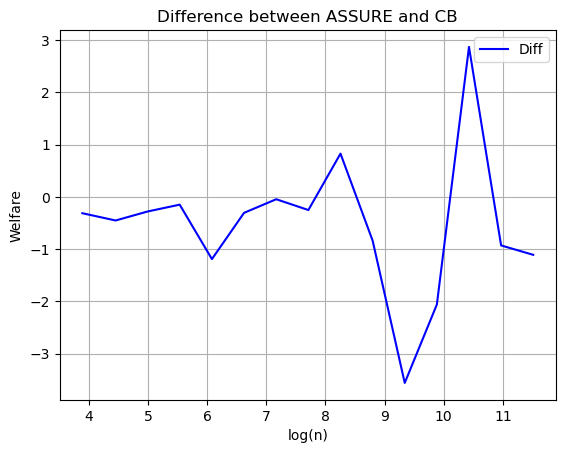

In [ ]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')

plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()


## Case IV: All Decisions are Positive; Low Variance

In [41]:
ns = np.logspace(np.log10(50), np.log10(1e5), num=15, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 20

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(2,0.5,n)
    sigmas = np.random.chisquare(5,n)/5

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
86
148
254
438
754
1299
2236
3848
6623
11398
19617
33761
58104
100000


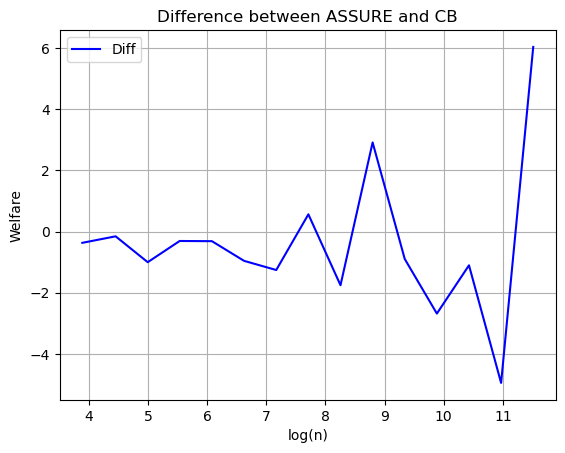

In [42]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')

plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()

## Case 4.5: All Decisions positive, with Larger Variances

In [44]:
ns = np.logspace(np.log10(50), np.log10(1e5), num=15, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 20

for i in range(len(ns)):
    n = int(ns[i])
    print(n)
    true_effects = np.random.normal(0.2,0.01,n)
    sigmas = np.random.chisquare(10,n)

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
86
148
254
438
754
1299
2236
3848
6623
11398
19617
33761
58104
100000


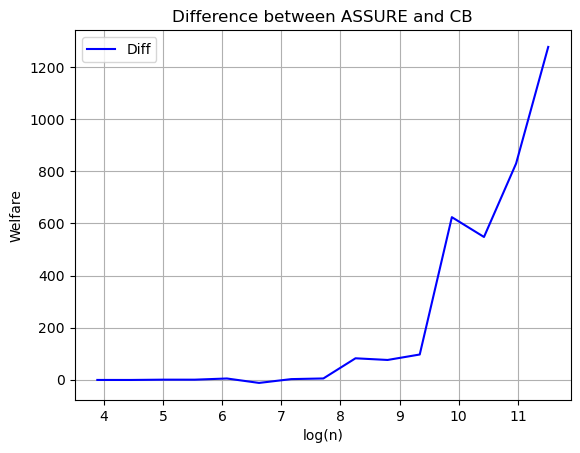

In [45]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')

plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()

## Case V: Mixture

In [46]:
ns = np.logspace(np.log10(50), np.log10(1e5), num=15, dtype=int)

assure_means = np.zeros(len(ns))
cb_means = np.zeros(len(ns))
assure_ses = np.zeros(len(ns))
cb_ses = np.zeros(len(ns))

diffs = np.zeros(len(ns))
diffs_ses = np.zeros(len(ns))

mc_runs = 20

for i in range(len(ns)):
    n = int(ns[i])
    print(n)

    if n % 2 == 1:
        n = n+1

    true_effects = np.concatenate((np.random.normal(-0.2, 0.1, int(n/2)), np.random.normal(0,0.5,int(n/2))))
    sigmas = np.random.chisquare(5,n)/5

    results = compare_methods(true_effects, sigmas, mc_runs=mc_runs)
    # Mean welfare
    assure_means[i] = results[0].mean()
    cb_means[i] = results[1].mean()

    # Standard error = std / sqrt(mc_runs)
    assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
    cb_ses[i] = results[1].std() / np.sqrt(mc_runs)

    diffs[i] = assure_means[i] - cb_means[i]
    diffs_ses[i] = (results[0] - results[1]).std()

49
86
148
254
438
754
1299
2236
3848
6623
11398
19617
33761
58104
100000


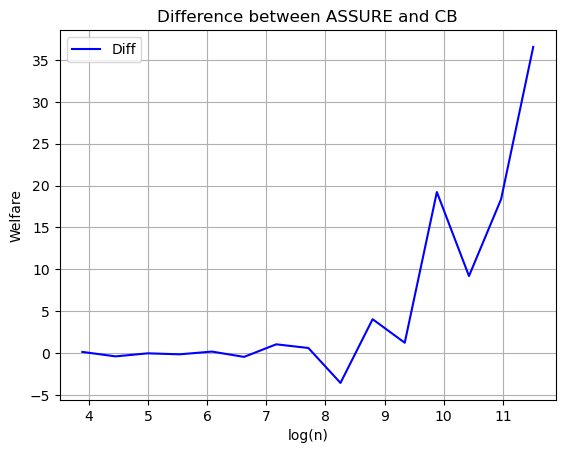

In [47]:
log_ns = np.log(ns)

plt.plot(log_ns, diffs, label="Diff", color='blue')

plt.xlabel("log(n)")
plt.ylabel("Welfare")
plt.title("Difference between ASSURE and CB")
plt.legend()
plt.grid(True)
plt.show()